In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run nnn/ipynb_init.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 432x288 with 0 Axes>

In [2]:
arr, data_split_dict = fileio.read_ml_data('./data/models/raw', append_2_arr=True)

santa_lucia = fileio.read_santalucia_df('./data/literature/SantaLucia.tsv')
correction_dict = fileio.read_pickle('./data/uv_melt/correction.pkl')
arr['dG_37'] = uv.correct_param(arr, correction_dict, 'dG_37')

arr['ddG_37'] = arr['dG_37'] - arr['dG_37_NUPACK_salt_corrected']
arr['ddG_37_abs'] = np.abs(arr['ddG_37'])

86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
Load from file ./data/fitted_variant/NNNlib2b_DNA_20211022_v6.CPvariant.gz
86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
Load from file ./data/fitted_variant/NNNlib2b_DNA_20211216_v9.CPvariant.gz
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5

Combining dH

Combining Tm

Combining dG_37

Combining dS

Combining fmax

Combining fmin
Load from file ./data/fitted_variant/NNNlib2b_DNA_20211216_v9.CPvariant.gz
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5


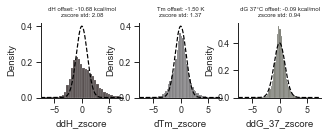

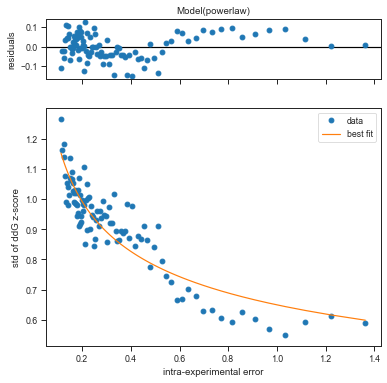

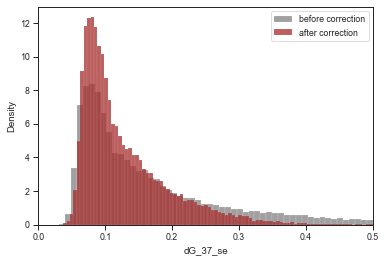

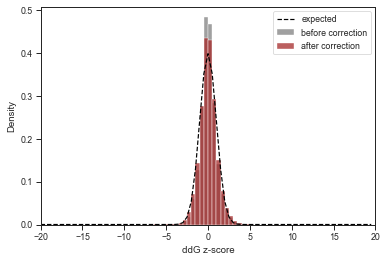

In [3]:
annotation_file = './data/annotation/NNNlib2b_annotation_20220519.tsv'
annotation = fileio.read_annotation(annotation_file)
replicate_df = pd.read_table('./data/nnnlib2b_replicates.tsv')
arraydata = ArrayData(replicate_df=replicate_df.iloc[:3,:],
                      annotation_file=annotation_file,
                      learn_error_adjust_from=('r1', 'r2'))
r2 = arraydata.get_replicate_data('r2')

In [4]:
datadir = "/Users/yuxi/Library/CloudStorage/GoogleDrive-kyx@stanford.edu/Shared drives/NNN_project/data/Tabular"
uv_df = pd.read_csv(os.path.join(datadir, 'UVMeltFitResultAggMerged.csv'), index_col=0)

In [79]:
#se_median = arr.dG_37_se.median()
# df = arr.query('data_split == "train" & dG_37_se < 0.084').sort_values(by='ddG_37').iloc[:500]

# seqid_list = []
# seqid_list.append(df.iloc[0,:].name)
# seqid_list.append(df.iloc[np.where(df.Series == 'Bulges')[0][1]].name)
# seqid_list.append(df.iloc[np.where(df.Series == 'TRIloop')[0][0]].name)
# seqid_list

['MMGTP3145', 'BNNN2110', 'TRINNN470']

## Select 5x7 variants for UV melting

In [149]:
def pick_variants(df):
    seqid_list = df.sort_values(by='ddG_37').iloc[:2,:].index.tolist()
    seqid_list += df.sort_values(by='ddG_37', ascending=False).iloc[:2,:].index.tolist()
    center_id = int(len(df) / 2)
    seqid_list += df.sort_values(by='ddG_37').iloc[center_id-1:center_id+1,:].index.tolist()
    seqid_list.append(df.sort_values(by='ddG_37_abs').iloc[0,:].name)
    return seqid_list
    
seqid_list = []

df = arr.query('data_split == "train" & dG_37_se < 0.084 & Series == "WatsonCrick"')
seqid_list += pick_variants(df)

df = arr.query('data_split == "train" & dG_37_se < 0.084 & Series == "TRIloop" & scaffold == "GATCGATC_nan"')
seqid_list += pick_variants(df)

df = arr.query('data_split == "train" & dG_37_se < 0.084 & Series == "TETRAloop" & bottomScaffold == "GATCGATC"')
seqid_list += pick_variants(df)

df = arr.query('data_split == "train" & dG_37_se < 0.084 & Series == "MisMatches" & bottomScaffold == "CGCG"')
seqid_list += pick_variants(df)

df = arr.query('data_split == "train" & dG_37_se < 0.084 & Series == "Bulges"')
seqid_list += pick_variants(df)

# arr.loc[seqid_list].ddG_37

In [147]:
# Check that nothing has been previously measured at ECL
for seq in seqid_list:
    if seq in np.unique(uv_df.SEQID):
        print(seq)

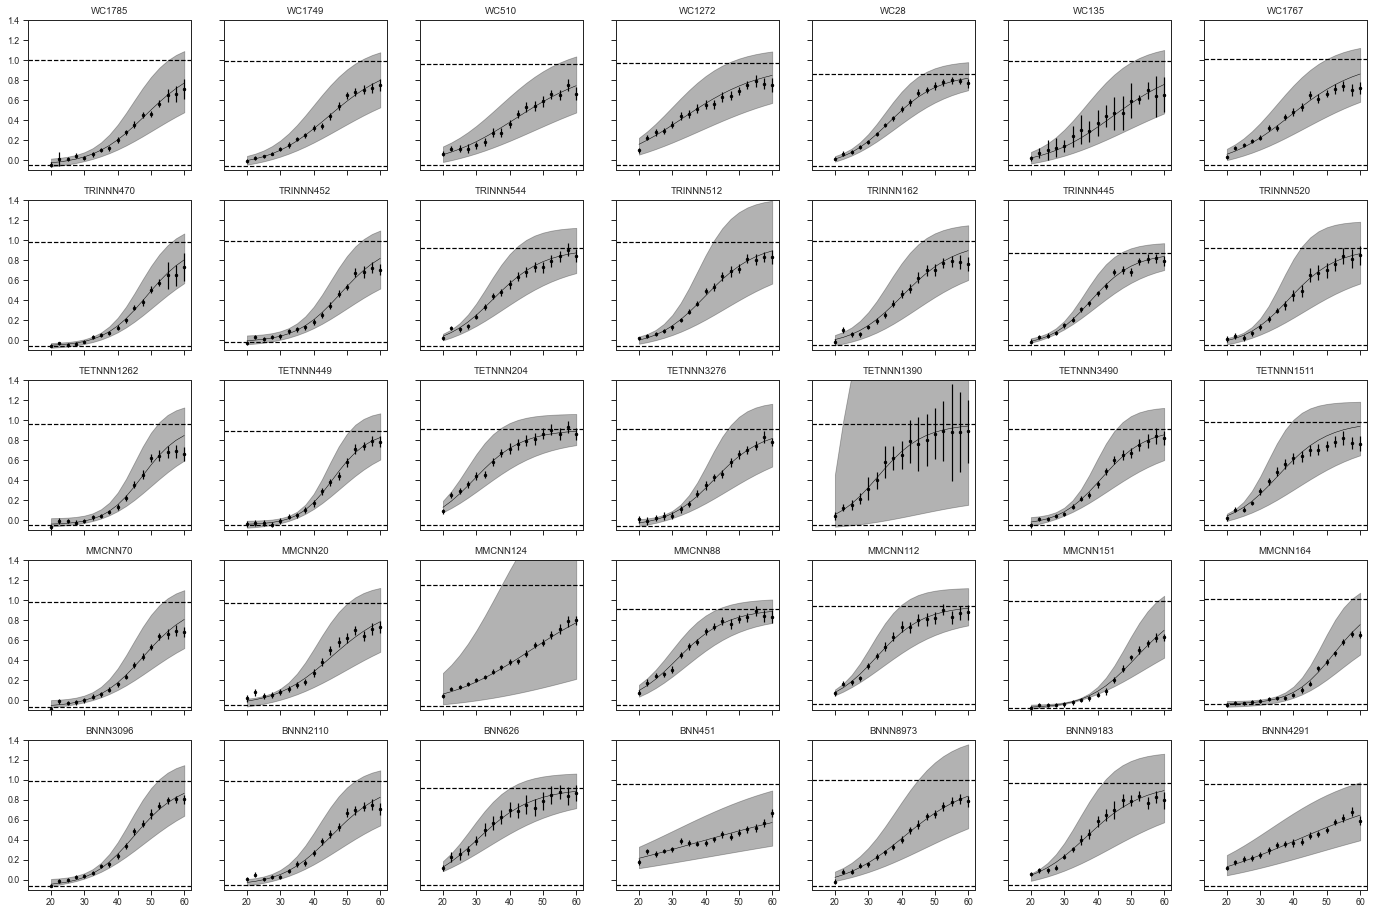

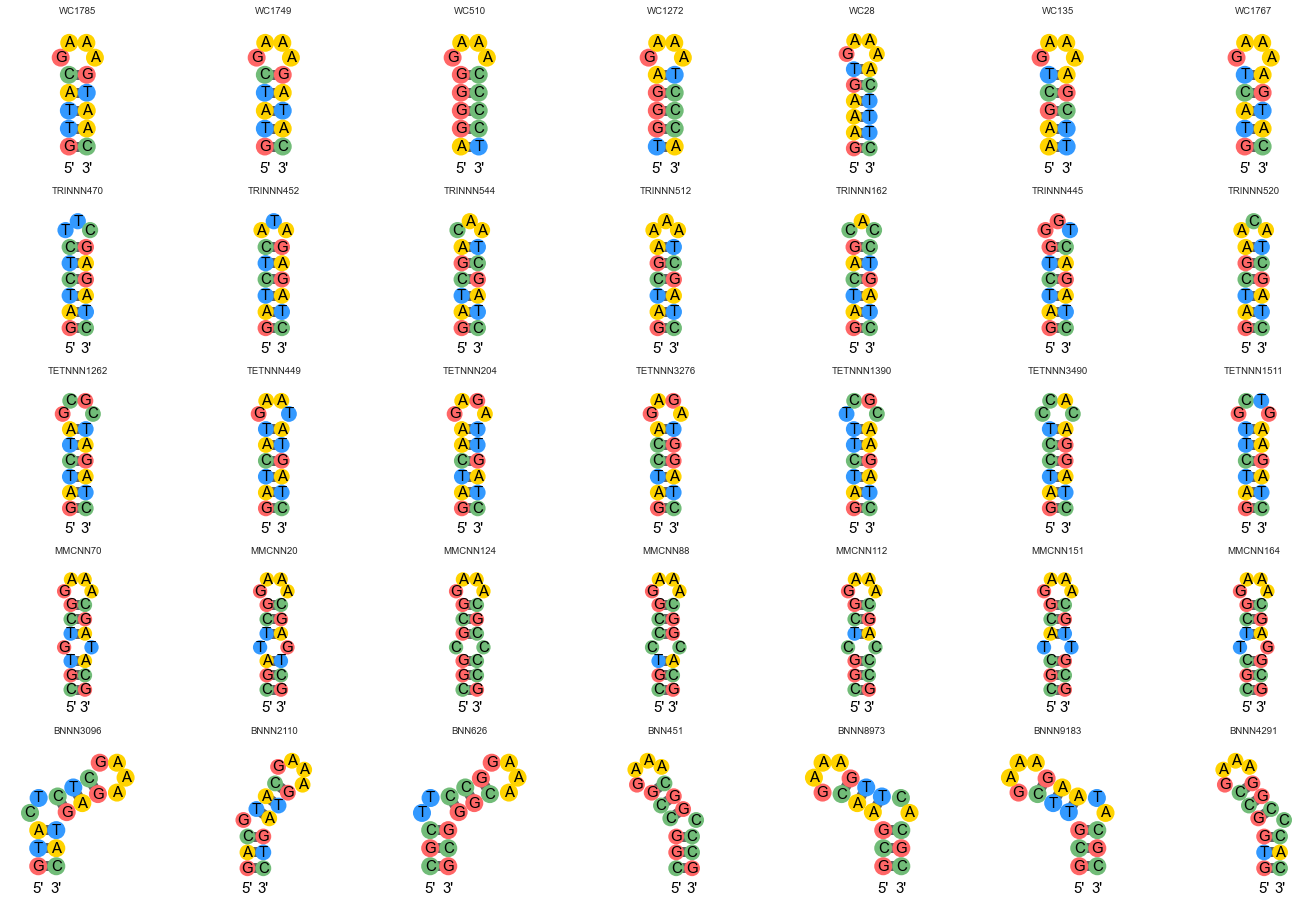

In [161]:
fig, ax = plt.subplots(5, 7, figsize=(24,16), sharey=True, sharex=True)
ax = ax.flatten()
r2_selected = r2.loc[seqid_list, :]
i = 0
for seqid,row in r2_selected.iterrows():
    plotting.plot_actual_and_expected_fit(row, ax[i])
    ax[i].set_title(seqid)
    i += 1

    
_, ax = plt.subplots(5, 7, figsize=(24,16))
ax = ax.flatten()
i = 0
for seqid,row in arr.loc[seqid_list].iterrows():
    draw_struct(row.RefSeq, row.TargetStruct, ax=ax[i])
    ax[i].set_title(seqid)
    i += 1
    
util.save_multi_image('./data/uv_melt/design/UV_35_order.pdf')

In [164]:
arr.loc[seqid_list, 'RefSeq'].to_csv('./data/uv_melt/design/UV_35_order.csv')
arr.loc[seqid_list, :].to_csv('./data/uv_melt/design/UV_35_order_arr.csv')

## Make variations of duplexes for WC1375

## Design random 16mers

In [25]:
from nupack import Domain, TargetStrand, TargetComplex, TargetTube, tube_design

In [151]:
# S stands for C or G
a = Domain('SSN12SS', name='a')
b = Domain('SSN12SS', name='b')
A = TargetStrand([a], name='strand A')
B = TargetStrand([b], name='strand B')

duplex = TargetComplex([A, B], '(8(8+)8)8', name='duplex16')

t1 = TargetTube(on_targets={duplex: 7.2e-5}, name='duplex16 tube')

In [124]:
celsius = 5
sodium = 0.083
my_model = nupack.Model(material='dna04', celsius=celsius, sodium=sodium, magnesium=0.0)
my_design = tube_design(tubes=[t1],
                        hard_constraints=[], soft_constraints=[],
                        defect_weights=None,
                        model=my_model)

In [125]:
my_results = my_design.run(trials=6)

In [126]:
for i in range(6):
    [print(s) for s in my_results[i].to_analysis.strands.values()]

CGAACCCAGAUUCGGCG
CGCCGAAUUGGGUUCG
GCGCUGCGUCACGUCGC
GCGACGUGCGCAGCGC
GCAGGUGCAGAAUAGCG
CGCUAUUCGCACCUGC
CGCGCACAGAUGGCCCG
CGGGCCAUUGUGCGCG
CGGCUUGGCGUCCCACG
CGUGGGACCCAAGCCG
GCCGCGGCUCAAAUUGC
GCAAUUUGGCCGCGGC


In [127]:
fn = './data/uv_melt/design/UV_16nt_B.csv'
seq = pd.read_csv(fn, header=None)
seq[0]=seq[0].apply(lambda x: x.replace('U', 'T'))

seq.to_csv(fn, header=None, index=None)

In [128]:
fn = './data/uv_melt/design/UV_16nt_IDT.csv'
seq = pd.read_csv(fn, header=None)

In [132]:
seq

,0,1
0,DWC001_5p,GCCGAACACTGGCCCG
1,DWC001_3p,CGGGCCAGTGTTCGGC
2,DWC002_5p,CGGTTGAAGACCGGGC
3,DWC002_3p,GCCCGGTCTTCAACCG
4,DMM001_5p,GCCAGTCTTGCGCACG
5,DMM001_3p,CGTGCGCACGACTGGC
6,DMM002_5p,GCAAGTCATTTGTACG
7,DMM002_3p,CGTACAAAGGACTTGC
8,DBU001_5p,GCCAGCCGCTGTGTGC
9,DBU001_3p,GCACACAGTCGGCTGGC


In [133]:
seq_reshape = seq[1].values.reshape(-1,2)

In [150]:
i = 1
util.get_nupack_dH_dS_Tm_dG_37(seq_reshape[i,:].tolist(), struct='(16+)16', sodium=0.083)

(-128.14169415867224,
 -0.34828870692151626,
 94.76802780888852,
 -20.121571058837034)

In [147]:
util.get_seq_structure_dG(seq_reshape[i,:].tolist(), '(16+)16', 37)

-26.05135141907946

In [146]:
isinstance(seq_reshape[i,:].tolist(), str)

False